# Case de Ciência de Dados

## Descrição do dataset

Para este case foi utilizado o dataset `Electricity ID=150` disponível no [OpenML](https://www.openml.org/search?type=data&sort=runs&id=151&status=active).

<p align='justify'>O `Electricity` é um dataset descrito por M. Harries e analisado por J. Gama (ver artigos abaixo). Esses dados foram coletados do mercado de eletricidade australiano de Nova Gales do Sul. Nesse mercado, os preços não são fixos e são afetados pela demanda e oferta do mercado. Eles são definidos a cada cinco minutos. As transferências de eletricidade de/para o estado vizinho de Victoria foram feitas para aliviar as flutuações.</p>

<p align='justify'>O conjunto de dados (originalmente denominado ELEC2) contém 45.312 instâncias datadas de 7 de maio de 1996 a 5 de dezembro de 1998. Cada exemplo do conjunto de dados refere-se a um período de 30 minutos, ou seja, há 48 instâncias para cada período de um dia. Cada exemplo no conjunto de dados tem 5 campos, o dia da semana, o carimbo de hora, a demanda de eletricidade de Nova Gales do Sul, a demanda de eletricidade de Victoria, a transferência de eletricidade programada entre estados e o rótulo da classe. O rótulo da classe identifica a mudança do preço (UP ou DOWN) em New South Wales em relação a uma média móvel das últimas 24 horas (e remove o impacto das tendências de preços de longo prazo).</p>

Os dados foram normalizados por A. Bifet.

## Descriçao dos Dados

| Nome        | Descrição                                                              | Range                            | Tipo
| --          | --                                                                     | --                               | --
| Date        | Data entre 7 de maio de 1996 a 5 dezembro de 1998.                     | Normalizado entre 0 e 1          | Numérico
| Day         | Dia da semana                                                          | Range entre 1 e 7                | Categórico
| Period      | Hora da medição (1-48) em intervalos de meia hora ao longo de 24 horas.| Normalizado entre 0 e 1          | Numérico
| NSWprice    | Preço da eletricidade em New South Wales                               | Normalizado entre 0 e 1          | Numérico
| NSWdemand   | Demanda de eletricidade em New South Wales                             | Normalizado entre 0 e 1          | Numérico
| VICprice    | Preço da eletricidade em Victoria                                      | Normalizado entre 0 e 1          | Numérico
| VICdemand   | Demanda de eletricidade em Vicoria                                     | Normalizado entre 0 e 1          | Numérico
| transfer    | Transferência programa de entricidade entre os dois estados            | Normalizado entre 0 e 1          | Numérico
| class(target)| Preço da eletricidade em NSW acima/abaixo da média de 24 horas        | 1 (Acima/UP) ou 0 (abaixo/DOWN)  | Numérico

## Artigos
M. Harries. [Splice-2 comparative evaluation: Electricity pricing](https://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=BCB2570AC299719CEA236621B98F4387?doi=10.1.1.12.9405&rep=rep1&type=pdf). Technical report, The University of South Wales, 1999.</br>
J. Gama, P. Medas, G. Castillo, and P. Rodrigues. [Learning with drift detection](https://dl.acm.org/doi/abs/10.1145/2523813). In SBIA Brazilian Symposium on Artificial Intelligence, pages 286–295, 2004.

## Objetivo

O principal objetivo é construir um classificador que melhor identifique a classe (UP/DOWN).

## Implementação da solução do problema

### Importação das bibliotecas necessárias

In [2]:
from sklearn import datasets as ds
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Leitura do dataset

In [3]:
df = ds.fetch_openml(data_id=151, as_frame=True, return_X_y=True)            # Carrega o dataset a partir do repositório do OpenML
df = pd.concat(df, axis=1).assign(target=lambda x: (x['class'] == 'UP') * 1)     # Adiciona a coluna "class" com as classes UP e DOWN

## Explorando o dataset


<p align='justify'>Explorar o conjunto é uma importante etapa do processo de construção de um modelo de Machine Learning. É nesta etapa que idenficamos possíveis incosistências nos dados fornecidos tais como: outliers, dados faltantes, informações incorretas. Esta análise também nos permite identificar padrões nos dados que já podem gerar conhecimentos úteis para o negócio.</br>

Informações gerais do dataset</br>
<p align='justify'>Uilizando o comando `info`são exibidas as caraceteríscas dos dados do dataset como: tipo dos dados, número de colunas, nomes das colunas, total de linhas, total de valores nulos em cada coluna.</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       45312 non-null  float64 
 1   day        45312 non-null  category
 2   period     45312 non-null  float64 
 3   nswprice   45312 non-null  float64 
 4   nswdemand  45312 non-null  float64 
 5   vicprice   45312 non-null  float64 
 6   vicdemand  45312 non-null  float64 
 7   transfer   45312 non-null  float64 
 8   class      45312 non-null  category
 9   target     45312 non-null  int32   
dtypes: category(2), float64(7), int32(1)
memory usage: 2.7 MB


O resultado anterior mostra que não há dados faltantes.</br>
<p justify='align'>A seguir o comando `describe` mostra algumas das principais métricas estatísticas das variáveis numéricas do conjunto de dados: média, mediana, desvio padrão, máximo, mínimo, 1º quartil (25%), 3º quartil (75%). Este é um comando útil para entender a distribuição dos dados.</p>
<p justify='align'>Como date e period foram registrados como numéricas o <code>describe</code> também acabou realizando o cálculo para tais métricas, embora não faça sentido. Vê-se que a variável <strong>vicprice</strong> é a de menor variabilidade e valor médio do conjunto. Como todas as variáveis numéricas já estão normalizadas, na mesma ordem de grandeza, é dispensável a normalização dos dados em etapas posteriores da construção do modelo.</p>

In [5]:
df.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526,0.424545
std,0.340308,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373,0.494279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912,0.000000
50%,0.456329,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912,0.000000
75%,0.880547,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualizando as primeiras linhas do dataset para ter-se noção do conteúdo.

In [7]:
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,target
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP,1
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP,1
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP,1
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP,1
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN,0


### Análise descritiva dos dados de eletricidade para New South Wales

<p align='justify'>Como o principal objetivo do case está relacionado ao consumo de eletricidade de New South Wales a seguir é realizada uma análise das variáveis relacionadas. O objetivo aqui é identificar padrões que possam existir nas séries de dados.<p>
<p align='justify'>O primeiro gráfico mostra a variação do preço da eletricide em New Soth Wales ao longo do dia.</p> 

In [82]:
# Definição da função para gerar os gráficos de linha
def grafico_linhas(y, title, ylabel, maxy=1.1, stepy=0.01):
    '''
        Função para gerar gráficos de linhas
        Args:
            y (string): Nome da coluna do dataset que estará no eixo y do gráfico
            title (string): Título do gráfico
            ylabel (string): Label do eixo y
            maxy (float): Limite máximo do eixo y
            stepy (float): Intervalo entre as marcações do eixo y
    '''
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    sns.lineplot(x=df['period']*24, y=y, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('Horário do dia', fontsize=12)
    ax.set_yticks(np.arange(0, maxy, stepy).round(2))
    ax.set_yticklabels(np.arange(0, maxy, stepy).round(2), fontsize=12)
    ax.set_xticks(np.arange(0, 25, 1))
    ax.set_xticklabels(np.arange(0, 25, 1), fontsize=12)
    ax.set_xlim(0, 24)
    ax.spines[['top', 'right']].set_visible(False)
    plt.show()

Plot do gráfico da varição do preço da eletricidade em New South Wales

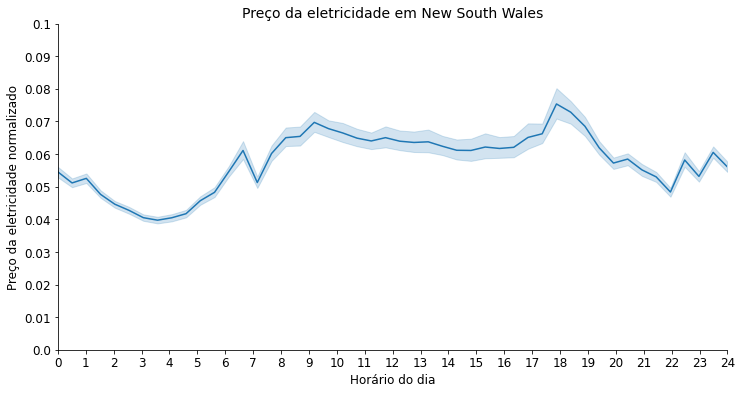

In [83]:
titulo = 'Preço da eletricidade em New South Wales'
ylabel = 'Preço da eletricidade normalizado'
maxy = 0.11
grafico_linhas(df['nswprice'], titulo, ylabel, maxy)

A linha mais escura do gráfico representa a média dos registros do dataset e a área sobreada representa o intervalo de confiança com nível de 95%.</br>
<p align='justify'><p>

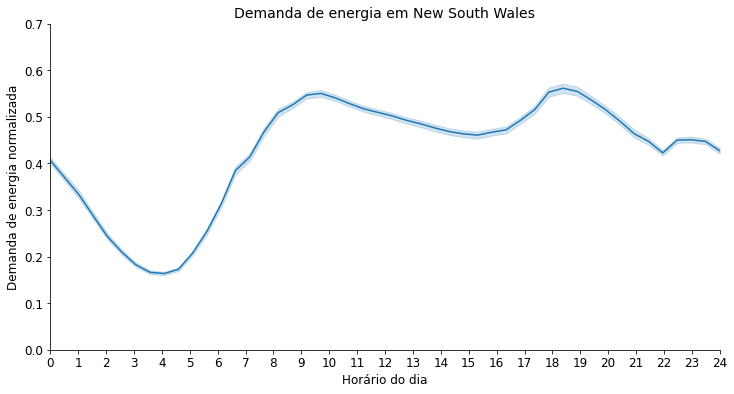

In [34]:
titulo = 'Demanda de energia em New South Wales'
ylabel = 'Demanda de energia normalizada'
maxy = .8
stepy = .1

grafico_linhas(df['nswdemand'], titulo, ylabel, maxy, stepy)

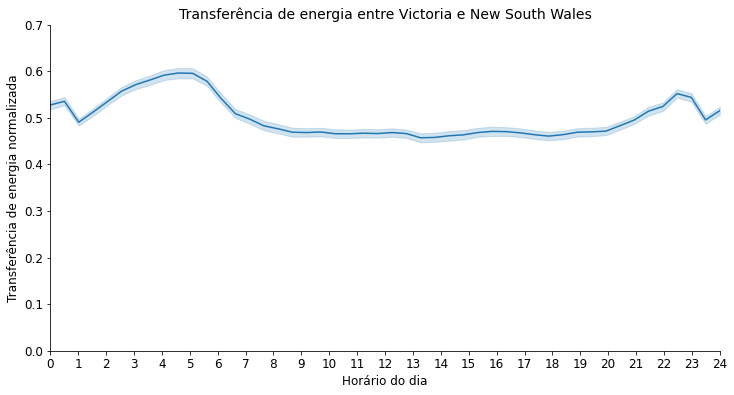

In [37]:
titulo = 'Transferência de energia entre Victoria e New South Wales'
ylabel = 'Transferência de energia normalizada'
maxy = .8
stepy = .1

grafico_linhas(df['transfer'], titulo, ylabel, maxy, stepy)

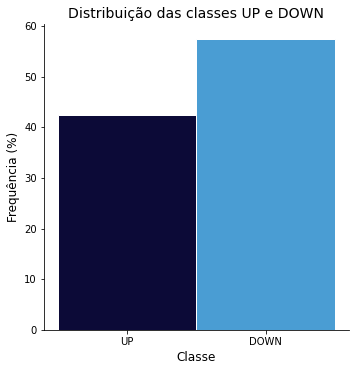

In [75]:
fig = sns.displot(data=df, x='class', stat='percent', hue='class', palette=['#0c0a37', '#4a9dd3'], alpha=1, legend=False, edgecolor='#ffffff')
fig.ax.set_ylabel('Frequência (%)', fontsize=12)
fig.ax.set_xlabel('Classe', fontsize=12)
fig.ax.set_title('Distribuição das classes UP e DOWN', fontsize=14)
plt.show()

In [74]:
df['class'].value_counts(normalize=True) * 100

DOWN    57.545463
UP      42.454537
Name: class, dtype: float64

### Modelagem

A seguir é feita a construção de um modelo de Machine Learning para realizar a predição das classes.

Para a composição do conjuntos de variáveis independentes (X) serão removidas as variáveis: `date`, `class`, `target`, `nswprice`, `vicprice`</br>
A remoção da variável `date` é justificada porque cada data é única e como não há repetição de eventos um modelo que considere data como atributo terá dificuldades de realizar previsões fora do período em que foi treinado.</br>
`class`e `target`foram removidas porque representam exatamente a variável de interesse. </br>
`nswprice`e `vicprice`foram removidas pois o interesse é realizar a predição se a tarifa estará acima ou abaixo da média das últimas 24 horas. Para fazer esta classificação a variável `target` utiliza exatamente estas informações, porém, a ideia seria realizar a predição antes de se ter tal informação por isto tais variáveis foram removidas. Caso tive-se o valor de tais variáveis em mãos, no momento da predição, não seria necessário um modelo de predição, o simples cálculo das médias passadas comparado com o preço atual seria o suficiente.</br>

#### Descrição do modelo RandomForest

O RandomForest

### Validação cruzada

#### Métricas de avaliação

#### Resultado

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(['date', 'class', 'target', 'nswprice', 'vicprice'], axis=1)
y = df['target']

RFC = RandomForestClassifier(random_state=101)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.3, random_state=101)


In [81]:
RFC.fit(X_treino, y_treino)
y_pred = RFC.predict(X_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_teste, y_pred)

0.712078858319847

In [ ]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      7755
           1       0.67      0.66      0.66      5839

    accuracy                           0.71     13594
   macro avg       0.71      0.71      0.71     13594
weighted avg       0.71      0.71      0.71     13594

